# How to use logistic regression to classify diabetic
*Justyna Krzywdziak*

In [5]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lregr=LogisticRegression()
lregr.fit(X_train, y_train)
pred_1=lregr.predict(X_test)


C:\FOLDER\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## View data

In [6]:
diab_data=pd.read_csv(r"C:\Users\Królowa J\Desktop\do gita\diabetes.csv",engine='python')

feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=diab_data[feature_names]
y=diab_data.Outcome

## Split data into train and test subsets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Logistic regression

In [13]:
lregr=LogisticRegression()
lregr.fit(X_train, y_train)
pred_1=lregr.predict(X_test)

C:\FOLDER\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Confusion matrix

Text(0.5, 257.44, 'Predicted label')

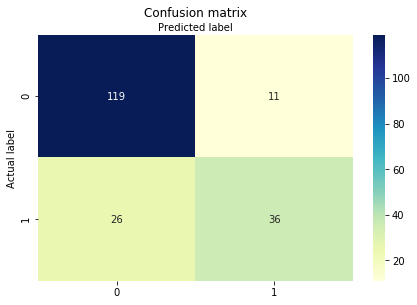

In [9]:
conf_matrix = metrics.confusion_matrix(y_test, pred_1)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Values

In [10]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(diab_data.loc[diab_data['Outcome'] == 1]), (len(diab_data.loc[diab_data['Outcome'] == 1])/len(diab_data.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(diab_data.loc[diab_data['Outcome'] == 0]), (len(diab_data.loc[diab_data['Outcome'] == 0])/len(diab_data.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 206 (35.76%)
Training Diabetes False Values   : 370 (64.24%)

Test Diabetes True Values        : 62 (32.29%)
Test Diabetes False Values       : 130 (67.71%)



## Finding the correlations in our data

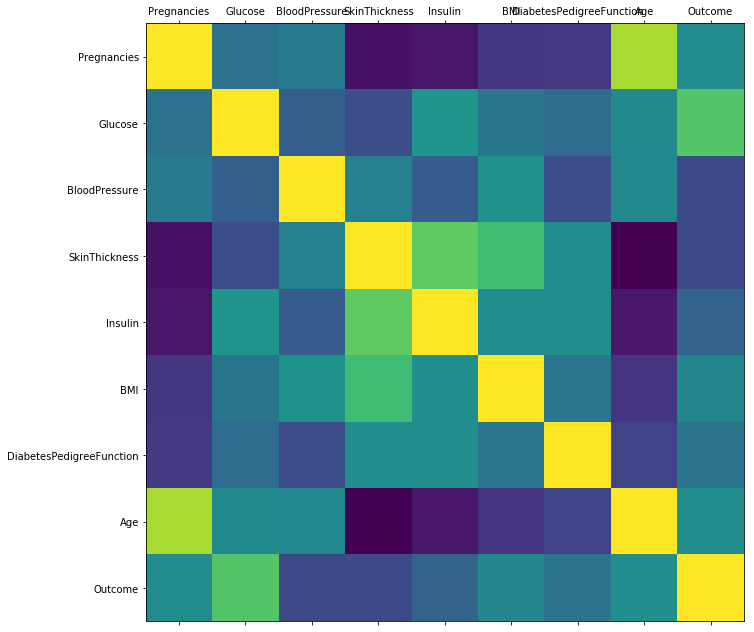

In [11]:
db = diab_data.corr()

def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(db)